In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import pi

In [26]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('Filipino Family Income and Expenditure.csv')
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [27]:
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace(',', '')
data.columns = data.columns.str.replace('/', '')
data.columns = data.columns.str.replace('-', '')
data.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,54,16,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,0,0

In [28]:
data['HouseholdHeadClassofWorker'].fillna('Unemployed', inplace=True)
data['HouseholdHeadOccupation'].fillna('Unemployed', inplace=True)

## ================================================================================

In [29]:
data['TotalHouseholdIncome_monthly'] = data['TotalHouseholdIncome']/12

In [30]:
target = 'TotalHouseholdIncome_monthly'

In [31]:
var = 'HouseholdHeadOccupation' 
a = data[var].astype('category').cat.categories
b = {i:data[data[var]==i][target].mean() for i in a}
b = sorted(b.items(), key=lambda kv: kv[1], reverse=True)
d = [i for i in b[255:379]]
a = [i[0] for i in d]
c = [i[1] for i in d]

In [32]:
data_lower_income =pd.DataFrame()
for i in a:
    data_lower_income = data_lower_income.append(data[data['HouseholdHeadOccupation'] == i],  ignore_index=True)

In [33]:
data_lower_income.shape

(19624, 61)

In [34]:
obj_df = data_lower_income.select_dtypes(include=['object']).copy()
for item in obj_df.columns:
    obj_df[item] = obj_df[item].astype('category')
    obj_df[item] = obj_df[item].cat.codes
obj_df.head()

,Region,MainSourceofIncome,HouseholdHeadSex,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TypeofBuildingHouse,TypeofRoof,TypeofWalls,TenureStatus,ToiletFacilities,MainSourceofWaterSupply
0,1,0,0,3,6,0,27,1,0,5,6,0,4,0,8
1,10,0,1,2,18,0,27,1,1,5,6,2,4,7,8
2,10,0,1,2,6,0,27,1,1,5,6,4,4,7,4
3,10,0,1,2,18,0,27,1,1,5,6,4,4,1,6
4,10,2,1,2,6,0,27,1,1,5,0,2,4,7,4


In [35]:
data2 = data_lower_income.copy()
for item in data2.columns:
    if item in obj_df.columns:
        data2[item] = obj_df[item]
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,NumberofTelevision,NumberofCDVCDDVD,NumberofComponentStereoset,NumberofRefrigeratorFreezer,NumberofWashingMachine,NumberofAirconditioner,NumberofCarJeepVan,NumberofLandlinewirelesstelephones,NumberofCellularphone,NumberofPersonalComputer,NumberofStovewithOvenGasRange,NumberofMotorizedBanca,NumberofMotorcycleTricycle,TotalHouseholdIncome_monthly
0,110775,1,54801,0,0,34236,31132,4963,5667,1105,4210,0,270,0,960,9648,3600,55,1680,300,0,2832,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,1,0,0,0,0,0,0,0,1,0,0,0,0,9231.250000
1,128716,10,62981,0,0,26275,21200,3569,3090,2645,2246,11735,0,0,3522,15624,6000,3627,9822,600,2265,4698,3000,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,1,0,0,0,0,0,0,0,2,0,0,0,1,10726.333333
2,161792,10,89059,0,0,24409,16161,12019,5784,2798,4289,20210,1440,5430,6268,20628,12000,539,8880,3534,1825,6600,15520,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,1,0,0,1,1,0,0,0,4,0,0,0,1,13482.666667
3,119845,10,64683,0,0,21967,15994,9239,4355,1476,3162,13230,325,3518,5165,12072,6000,1033,6132,576,695,4572,600,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,0,0,0,0,0,0,0,0,2,0,0,0,1,9987.083333
4,122813,10,60429,2,0,29078,25552,2430,11054,2642,5563,860,1660,1945,2120,10872,6000,559,1260,318,800,4086,0,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,1,1,0,0,0,0,0,0,1,0,0,0,0,10234.416667


In [36]:
data2['TotalMovableAssests'] = data2['NumberofTelevision'] + data2['NumberofCDVCDDVD'] + data2['NumberofComponentStereoset'] + data2['NumberofRefrigeratorFreezer'] + data2['NumberofWashingMachine'] + data2['NumberofAirconditioner'] + data2['NumberofCarJeepVan'] + data2['NumberofLandlinewirelesstelephones'] + data2['NumberofCellularphone'] + data2['NumberofPersonalComputer'] + data2['NumberofStovewithOvenGasRange'] + data2['NumberofMotorizedBanca'] + data2['NumberofMotorcycleTricycle']

In [37]:
data2 = data2.drop(['NumberofTelevision', 'NumberofCDVCDDVD', 'NumberofComponentStereoset', 'NumberofRefrigeratorFreezer', 'NumberofWashingMachine', 'NumberofAirconditioner', 'NumberofCarJeepVan', 'NumberofLandlinewirelesstelephones', 'NumberofCellularphone', 'NumberofPersonalComputer', 'NumberofStovewithOvenGasRange', 'NumberofMotorizedBanca', 'NumberofMotorcycleTricycle'], axis = 1)

In [38]:
data2.shape

(19624, 49)

In [39]:
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests
0,110775,1,54801,0,0,34236,31132,4963,5667,1105,4210,0,270,0,960,9648,3600,55,1680,300,0,2832,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2
1,128716,10,62981,0,0,26275,21200,3569,3090,2645,2246,11735,0,0,3522,15624,6000,3627,9822,600,2265,4698,3000,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4
2,161792,10,89059,0,0,24409,16161,12019,5784,2798,4289,20210,1440,5430,6268,20628,12000,539,8880,3534,1825,6600,15520,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8
3,119845,10,64683,0,0,21967,15994,9239,4355,1476,3162,13230,325,3518,5165,12072,6000,1033,6132,576,695,4572,600,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3
4,122813,10,60429,2,0,29078,25552,2430,11054,2642,5563,860,1660,1945,2120,10872,6000,559,1260,318,800,4086,0,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3


In [40]:
data2['TotalOverallExpenditure'] = data2['TotalFoodExpenditure'] + data2['BreadandCerealsExpenditure'] + data2['TotalRiceExpenditure'] + data2['MeatExpenditure'] + data2['TotalFishandmarineproductsExpenditure'] + data2['FruitExpenditure'] + data2['VegetablesExpenditure'] + data2['RestaurantandhotelsExpenditure'] + data2['AlcoholicBeveragesExpenditure'] + data2['TobaccoExpenditure'] + data2['ClothingFootwearandOtherWearExpenditure'] + data2['HousingandwaterExpenditure'] + data2['MedicalCareExpenditure'] + data2['TransportationExpenditure'] + data2['CommunicationExpenditure'] + data2['EducationExpenditure'] + data2['MiscellaneousGoodsandServicesExpenditure'] + data2['SpecialOccasionsExpenditure']

In [41]:
data2['TotalAnnualSavings'] = data2['TotalHouseholdIncome'] - data2['TotalOverallExpenditure']

In [42]:
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests,TotalOverallExpenditure,TotalAnnualSavings
0,110775,1,54801,0,0,34236,31132,4963,5667,1105,4210,0,270,0,960,9648,3600,55,1680,300,0,2832,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2,151859,-41084
1,128716,10,62981,0,0,26275,21200,3569,3090,2645,2246,11735,0,0,3522,15624,6000,3627,9822,600,2265,4698,3000,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4,176899,-48183
2,161792,10,89059,0,0,24409,16161,12019,5784,2798,4289,20210,1440,5430,6268,20628,12000,539,8880,3534,1825,6600,15520,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8,245393,-83601
3,119845,10,64683,0,0,21967,15994,9239,4355,1476,3162,13230,325,3518,5165,12072,6000,1033,6132,576,695,4572,600,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3,168794,-48949
4,122813,10,60429,2,0,29078,25552,2430,11054,2642,5563,860,1660,1945,2120,10872,6000,559,1260,318,800,4086,0,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3,161228,-38415


In [43]:
data2.columns

Index(['TotalHouseholdIncome', 'Region', 'TotalFoodExpenditure',
       'MainSourceofIncome', 'AgriculturalHouseholdindicator',
       'BreadandCerealsExpenditure', 'TotalRiceExpenditure', 'MeatExpenditure',
       'TotalFishandmarineproductsExpenditure', 'FruitExpenditure',
       'VegetablesExpenditure', 'RestaurantandhotelsExpenditure',
       'AlcoholicBeveragesExpenditure', 'TobaccoExpenditure',
       'ClothingFootwearandOtherWearExpenditure', 'HousingandwaterExpenditure',
       'ImputedHouseRentalValue', 'MedicalCareExpenditure',
       'TransportationExpenditure', 'CommunicationExpenditure',
       'EducationExpenditure', 'MiscellaneousGoodsandServicesExpenditure',
       'SpecialOccasionsExpenditure', 'CropFarmingandGardeningexpenses',
       'TotalIncomefromEntrepreneurialAcitivites', 'HouseholdHeadSex',
       'HouseholdHeadAge', 'HouseholdHeadMaritalStatus',
       'HouseholdHeadHighestGradeCompleted',
       'HouseholdHeadJoborBusinessIndicator', 'HouseholdHeadOccupation'

In [44]:
data2['PeoplePerSquareRoot'] = data2['HouseFloorArea'] // data2['TotalNumberofFamilymembers']

In [45]:
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests,TotalOverallExpenditure,TotalAnnualSavings,PeoplePerSquareRoot
0,110775,1,54801,0,0,34236,31132,4963,5667,1105,4210,0,270,0,960,9648,3600,55,1680,300,0,2832,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2,151859,-41084,8
1,128716,10,62981,0,0,26275,21200,3569,3090,2645,2246,11735,0,0,3522,15624,6000,3627,9822,600,2265,4698,3000,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4,176899,-48183,2
2,161792,10,89059,0,0,24409,16161,12019,5784,2798,4289,20210,1440,5430,6268,20628,12000,539,8880,3534,1825,6600,15520,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8,245393,-83601,7
3,119845,10,64683,0,0,21967,15994,9239,4355,1476,3162,13230,325,3518,5165,12072,6000,1033,6132,576,695,4572,600,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3,168794,-48949,2
4,122813,10,60429,2,0,29078,25552,2430,11054,2642,5563,860,1660,1945,2120,10872,6000,559,1260,318,800,4086,0,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3,161228,-38415,2


In [51]:
data2['TotalOverallExpenditure'] = data2['BreadandCerealsExpenditure'] + data2['TotalRiceExpenditure'] + data2['MeatExpenditure'] + data2['TotalFishandmarineproductsExpenditure'] + data2['FruitExpenditure'] + data2['VegetablesExpenditure'] + data2['RestaurantandhotelsExpenditure'] + data2['AlcoholicBeveragesExpenditure'] + data2['TobaccoExpenditure'] + data2['ClothingFootwearandOtherWearExpenditure'] + data2['HousingandwaterExpenditure'] + data2['MedicalCareExpenditure'] + data2['TransportationExpenditure'] + data2['CommunicationExpenditure'] + data2['EducationExpenditure'] + data2['MiscellaneousGoodsandServicesExpenditure'] + data2['SpecialOccasionsExpenditure']

In [52]:
data2['TotalAnnualSavings'] = data2['TotalHouseholdIncome'] - data2['TotalOverallExpenditure']

In [53]:
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests,TotalOverallExpenditure,TotalAnnualSavings,PeoplePerSquareRoot,TotalUnnecessaryExpenditure
0,110775,1,54801,0,0,34236,31132,4963,5667,1105,4210,0,270,0,960,9648,3600,55,1680,300,0,2832,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2,97058,13717,8,4362
1,128716,10,62981,0,0,26275,21200,3569,3090,2645,2246,11735,0,0,3522,15624,6000,3627,9822,600,2265,4698,3000,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4,113918,14798,2,23555
2,161792,10,89059,0,0,24409,16161,12019,5784,2798,4289,20210,1440,5430,6268,20628,12000,539,8880,3534,1825,6600,15520,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8,156334,5458,7,59002
3,119845,10,64683,0,0,21967,15994,9239,4355,1476,3162,13230,325,3518,5165,12072,6000,1033,6132,576,695,4572,600,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3,104111,15734,2,27986
4,122813,10,60429,2,0,29078,25552,2430,11054,2642,5563,860,1660,1945,2120,10872,6000,559,1260,318,800,4086,0,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3,100799,22014,2,10989


In [61]:
data2['SavingRate'] = (data2['TotalAnnualSavings']/data2['TotalHouseholdIncome'] )* 100

In [62]:
data2.head()

,TotalHouseholdIncome,Region,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,BreadandCerealsExpenditure,TotalRiceExpenditure,MeatExpenditure,TotalFishandmarineproductsExpenditure,FruitExpenditure,VegetablesExpenditure,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests,TotalOverallExpenditure,TotalAnnualSavings,PeoplePerSquareRoot,TotalUnnecessaryExpenditure,SavingRate
0,110775,1,54801,0,0,34236,31132,4963,5667,1105,4210,0,270,0,960,9648,3600,55,1680,300,0,2832,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2,97058,13717,8,4362,12.382758
1,128716,10,62981,0,0,26275,21200,3569,3090,2645,2246,11735,0,0,3522,15624,6000,3627,9822,600,2265,4698,3000,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4,113918,14798,2,23555,11.496628
2,161792,10,89059,0,0,24409,16161,12019,5784,2798,4289,20210,1440,5430,6268,20628,12000,539,8880,3534,1825,6600,15520,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8,156334,5458,7,59002,3.373467
3,119845,10,64683,0,0,21967,15994,9239,4355,1476,3162,13230,325,3518,5165,12072,6000,1033,6132,576,695,4572,600,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3,104111,15734,2,27986,13.128624
4,122813,10,60429,2,0,29078,25552,2430,11054,2642,5563,860,1660,1945,2120,10872,6000,559,1260,318,800,4086,0,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3,100799,22014,2,10989,17.924813


In [150]:
data2 = data2.drop('Region', axis=1)

In [153]:
data2 = data2.drop(['FruitExpenditure','VegetablesExpenditure','TotalRiceExpenditure','BreadandCerealsExpenditure'], axis=1)

In [154]:
data2['TotalUnnecessaryExpenditure'] = data2['RestaurantandhotelsExpenditure'] + data2['AlcoholicBeveragesExpenditure'] + data2['TobaccoExpenditure'] + data2['ClothingFootwearandOtherWearExpenditure'] + data2['CommunicationExpenditure'] + data2['MiscellaneousGoodsandServicesExpenditure'] + data2['SpecialOccasionsExpenditure']

In [156]:
data2.head()

,TotalHouseholdIncome,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,RestaurantandhotelsExpenditure,AlcoholicBeveragesExpenditure,TobaccoExpenditure,ClothingFootwearandOtherWearExpenditure,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,CommunicationExpenditure,EducationExpenditure,MiscellaneousGoodsandServicesExpenditure,SpecialOccasionsExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests,TotalOverallExpenditure,TotalAnnualSavings,PeoplePerSquareRoot,TotalUnnecessaryExpenditure,SavingRate
0,110775,54801,0,0,0,270,0,960,9648,3600,55,1680,300,0,2832,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2,97058,13717,8,4362,12.382758
1,128716,62981,0,0,11735,0,0,3522,15624,6000,3627,9822,600,2265,4698,3000,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4,113918,14798,2,23555,11.496628
2,161792,89059,0,0,20210,1440,5430,6268,20628,12000,539,8880,3534,1825,6600,15520,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8,156334,5458,7,59002,3.373467
3,119845,64683,0,0,13230,325,3518,5165,12072,6000,1033,6132,576,695,4572,600,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3,104111,15734,2,27986,13.128624
4,122813,60429,2,0,860,1660,1945,2120,10872,6000,559,1260,318,800,4086,0,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3,100799,22014,2,10989,17.924813


In [157]:
data2 = data2.drop(['AlcoholicBeveragesExpenditure','RestaurantandhotelsExpenditure','TobaccoExpenditure','ClothingFootwearandOtherWearExpenditure','CommunicationExpenditure','MiscellaneousGoodsandServicesExpenditure','SpecialOccasionsExpenditure'], axis=1)

In [167]:
data2.head()

,TotalHouseholdIncome,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,EducationExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests,TotalOverallExpenditure,TotalAnnualSavings,PeoplePerSquareRoot,TotalUnnecessaryExpenditure,SavingRate
0,110775,54801,0,0,9648,3600,55,1680,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2,97058,13717,8,4362,12.382758
1,128716,62981,0,0,15624,6000,3627,9822,2265,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4,113918,14798,2,23555,11.496628
2,161792,89059,0,0,20628,12000,539,8880,1825,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8,156334,5458,7,59002,3.373467
3,119845,64683,0,0,12072,6000,1033,6132,695,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3,104111,15734,2,27986,13.128624
4,122813,60429,2,0,10872,6000,559,1260,800,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3,100799,22014,2,10989,17.924813


In [63]:
byedu = data2.groupby(by='HouseholdHeadHighestGradeCompleted', as_index=True).mean().sort_values(by='SavingRate', ascending=False)

##  Correaltion feature selection

In [109]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [177]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [178]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\rames\anaconda3\envs\nus\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Feature 0: 1772.204485
Feature 1: 63.125611
Feature 2: 24.066532
Feature 3: 53.060818
Feature 4: 204.697812
Feature 5: 193.517026
Feature 6: 0.239319
Feature 7: 117.536873
Feature 8: 0.237714
Feature 9: 289.474569
Feature 10: 446.043963
Feature 11: 15.287980
Feature 12: 93.224275
Feature 13: 14.429462
Feature 14: 0.960723
Feature 15: nan
Feature 16: 0.001504
Feature 17: 0.176421
Feature 18: 25.738692
Feature 19: 161.253863
Feature 20: 57.159027
Feature 21: 508.526821
Feature 22: 129.526735
Feature 23: 13.758004
Feature 24: 70.889866
Feature 25: 127.261821
Feature 26: 115.521828
Feature 27: 64.437946
Feature 28: 128.156842
Feature 29: 39.270471
Feature 30: 193.680014
Feature 31: 66.708166
Feature 32: 2.824285
Feature 33: 1772.204485
Feature 34: 495.471666
Feature 35: 0.052615
Feature 36: 4432.771732
Feature 37: 168.946933
Feature 38: 4.878232


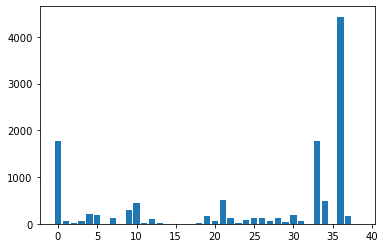

In [183]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [181]:
X_test_fs.shape

(6476, 39)

## Mutual Information Feature Selection

In [184]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [185]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Feature 0: 0.133180
Feature 1: 0.011865
Feature 2: 0.010681
Feature 3: 0.004759
Feature 4: 0.034425
Feature 5: 0.010408
Feature 6: 0.001906
Feature 7: 0.004554
Feature 8: 0.015589
Feature 9: 0.033709
Feature 10: 0.045986
Feature 11: 0.001668
Feature 12: 0.019224
Feature 13: 0.003303
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.023509
Feature 17: 0.017033
Feature 18: 0.000000
Feature 19: 0.017950
Feature 20: 0.004310
Feature 21: 0.031547
Feature 22: 0.000971
Feature 23: 0.003169
Feature 24: 0.002033
Feature 25: 0.011411
Feature 26: 0.002904
Feature 27: 0.002243
Feature 28: 0.018548
Feature 29: 0.008170
Feature 30: 0.021999
Feature 31: 0.001389
Feature 32: 0.006343
Feature 33: 0.133178
Feature 34: 0.021846
Feature 35: 0.017267
Feature 36: 1.483674
Feature 37: 0.016572
Feature 38: 0.016623


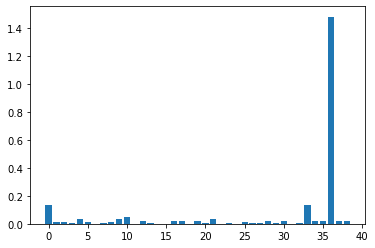

In [186]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [159]:
X = data2.drop('SavingRate', axis=1)

In [160]:
y = data2[['SavingRate']]

In [168]:
X.head()

,TotalHouseholdIncome,TotalFoodExpenditure,MainSourceofIncome,AgriculturalHouseholdindicator,HousingandwaterExpenditure,ImputedHouseRentalValue,MedicalCareExpenditure,TransportationExpenditure,EducationExpenditure,CropFarmingandGardeningexpenses,TotalIncomefromEntrepreneurialAcitivites,HouseholdHeadSex,HouseholdHeadAge,HouseholdHeadMaritalStatus,HouseholdHeadHighestGradeCompleted,HouseholdHeadJoborBusinessIndicator,HouseholdHeadOccupation,HouseholdHeadClassofWorker,TypeofHousehold,TotalNumberofFamilymembers,Memberswithagelessthan5yearold,Memberswithage517yearsold,Totalnumberoffamilymembersemployed,TypeofBuildingHouse,TypeofRoof,TypeofWalls,HouseFloorArea,HouseAge,Numberofbedrooms,TenureStatus,ToiletFacilities,Electricity,MainSourceofWaterSupply,TotalHouseholdIncome_monthly,TotalMovableAssests,TotalOverallExpenditure,TotalAnnualSavings,PeoplePerSquareRoot,TotalUnnecessaryExpenditure
0,110775,54801,0,0,9648,3600,55,1680,0,0,78000,0,59,3,6,0,27,1,0,4,0,0,0,5,6,0,35,12,2,4,0,1,8,9231.250000,2,97058,13717,8,4362
1,128716,62981,0,0,15624,6000,3627,9822,2265,0,97402,1,36,2,18,0,27,1,1,5,0,3,0,5,6,2,12,1,1,4,7,1,8,10726.333333,4,113918,14798,2,23555
2,161792,89059,0,0,20628,12000,539,8880,1825,71680,120250,1,49,2,6,0,27,1,1,5,0,2,0,5,6,4,35,18,2,4,7,1,4,13482.666667,8,156334,5458,7,59002
3,119845,64683,0,0,12072,6000,1033,6132,695,0,54690,1,49,2,18,0,27,1,1,4,0,1,1,5,6,4,10,20,1,4,1,1,6,9987.083333,3,104111,15734,2,27986
4,122813,60429,2,0,10872,6000,559,1260,800,0,15738,1,40,2,6,0,27,1,1,7,1,4,3,5,0,2,20,8,3,4,7,1,4,10234.416667,3,100799,22014,2,10989


In [169]:
X.shape

(19624, 39)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [182]:
X_test.shape

(6476, 39)

In [144]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot

In [162]:
model = XGBRegressor()

In [163]:
model.fit(X, y)

[22:01:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [164]:
importance = model.feature_importances_

In [165]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07977
Feature: 1, Score: 0.34931
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00822
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00208
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00539
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00054
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00534
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00039
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.05608
Fe

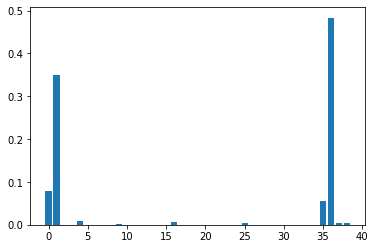

In [166]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()